In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [31]:
df = pd.read_csv("Sank.csv")
df

,Alive,Class,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


<h1 style="text-align:center;color:purple">Data Exploration part </h1>

In [32]:
df.describe()

,Alive,Class,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Alive   891 non-null    int64  
 1   Class   891 non-null    int64  
 2   Sex     891 non-null    object 
 3   Age     714 non-null    float64
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


<h4 style="color:red">As we can see, there are 177 null-values in AGE column, so we should whether drop or fill these columns otherwise, it affects our model accuracy.</h4>

<h4> We need to find Median value of Age column </h4>

In [34]:
import math
ageMedian = math.floor(df["Age"].mean())
ageMedian

29

<h4> We filled null columns with median values

In [35]:
df["Age"] = df["Age"].fillna(ageMedian)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Alive   891 non-null    int64  
 1   Class   891 non-null    int64  
 2   Sex     891 non-null    object 
 3   Age     891 non-null    float64
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [37]:
df.groupby('Alive').mean()

,Class,Age,Fare
Alive,,,
0,2.531876,30.25592,22.117887
1,1.950292,28.44348,48.395408


From above table we can draw following conclusions,
<ol>
    <li><b>**Class**</b>: passenger class level seems to be relatively low (1.95) in people are survived vs the not survived (2.53)</li>
    <li><b><b>**AGE**</b></b>: Average Age are slightly lower in people are survived (28) vs the not survived (30)</li>
    <li><b>**Fare**</b>: AVerage Fare are significantly higher in people are survived(48) vs the not survived(22) </li>
</ol>

<h3 style="color:green">Impact of Class to the Alive </h3>

<AxesSubplot:xlabel='Class'>

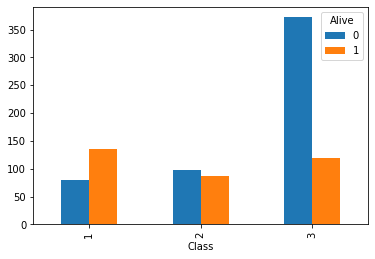

In [38]:
pd.crosstab(df.Class,df.Alive).plot(kind='bar')

Above bar chart shows people with high class are likely to not survived

<b>Inputs  = Class,Age,Fare

In [39]:
inputs = df.drop('Alive',axis='columns')
inputs

,Class,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,29.0,23.4500
889,1,male,26.0,30.0000


In [40]:
output = df['Alive']
output

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Alive, Length: 891, dtype: int64

<h4 style="color:darkorange"> By using LabelEncoder, we should change Sex names(male,female) to 0 and 1. </h4>

In [46]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()

In [47]:
inputs['sex_new'] = le_sex.fit_transform(inputs['Sex'])

In [48]:
inputs

,Class,Sex,Age,Fare,sex_new
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1
...,...,...,...,...,...
886,2,male,27.0,13.0000,1
887,1,female,19.0,30.0000,0
888,3,female,29.0,23.4500,0
889,1,male,26.0,30.0000,1


In [49]:
inputs.drop(['Sex'],axis='columns',inplace=True)

In [50]:
inputs

,Class,Age,Fare,sex_new
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,29.0,23.4500,0
889,1,26.0,30.0000,1


<h4 style="text-align:left;color:red"> we will divide data into two datasets: train_set and test_set </h4>

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(inputs,output, test_size=0.2)

<h1 style="text-align:center;color:purple">Creating Model with Decision tree  </h1>

In [53]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini',random_state=42)

In [54]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

<h5 style="color:red"> Class = 1, Male, Age: 28,  Fare:  20.5 </h5>

In [55]:
model.predict([[1,28,20.5,1]])

array([0], dtype=int64)

<h5 style="color:red"> Class = 2, Male, Age: 70,  Fare:  7.5 </h5>

In [56]:
model.predict([[2,70,7.5,1]])

array([0], dtype=int64)

<h5 style="color:red"> Class = 3, Female, Age: 25,  Fare:  6.76 </h5>

In [57]:
model.predict([[3,25,6.76,0]])

array([0], dtype=int64)

<h5 style="color:red"> Class = 2, Female, Age: 43,  Fare:  12.88 </h5>

In [58]:
model.predict([[2,43,12.88,0]])

array([1], dtype=int64)

In [59]:
model.score(X_test, y_test)

0.7932960893854749

<h3 style="color:green;text-align:center">Model accuracy in Decision Tree Algorithm is 77.6 </h3>

<h4 style='color:purple'>Confusion Matrix</h4>

In [60]:
y_predicted = model.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[85, 22],
       [15, 57]], dtype=int64)

Text(69.0, 0.5, 'Truth')

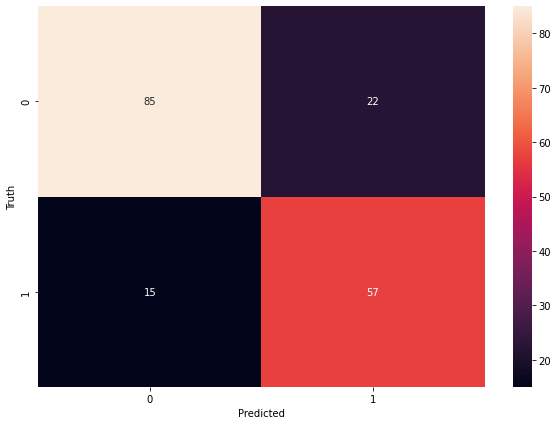

In [62]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h4 style="color:darkgreen">From the above Confusion matrix We can conclude that 
    <ul>
        <li>We predicted that 86 people will not sink and it is correct </li>
        <li>We predicted that 22 people will not sink and it is not correct</li>
        <li>We predicted that 52 people will sink and it is correct</li>
        <li>We predicted that 19 people will sink and it is not correct</li>
    </ul>

<h1 style="text-align:center;color:red">Model with Logistic regression </h1>

In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)

In [64]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [65]:
model.score(X_test, y_test)

0.8044692737430168

<h3 style="color:green;text-align:center">Model accuracy in Logistic regression is 77.6 </h3>

<h5 style="color:red"> Class = 1, Male, Age: 28,  Fare:  20.5 </h5>

In [66]:
model.predict([[1,28,20.5,1]])

array([1], dtype=int64)

<h5 style="color:red"> Class = 2, Male, Age: 70,  Fare:  7.5 </h5>

In [67]:
model.predict([[2,70,7.5,1]])

array([0], dtype=int64)

<h5 style="color:red"> Class = 3, Female, Age: 25,  Fare:  6.76 </h5>

In [68]:
model.predict([[3,25,6.76,0]])

array([1], dtype=int64)

<h5 style="color:red"> Class = 2, Female, Age: 43,  Fare:  12.88 </h5>

In [69]:
model.predict([[2,43,12.88,0]])

array([1], dtype=int64)

<h4 style='color:purple'>Confusion Matrix</h4>

In [70]:
y_predicted = model.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[86, 21],
       [14, 58]], dtype=int64)

Text(69.0, 0.5, 'Truth')

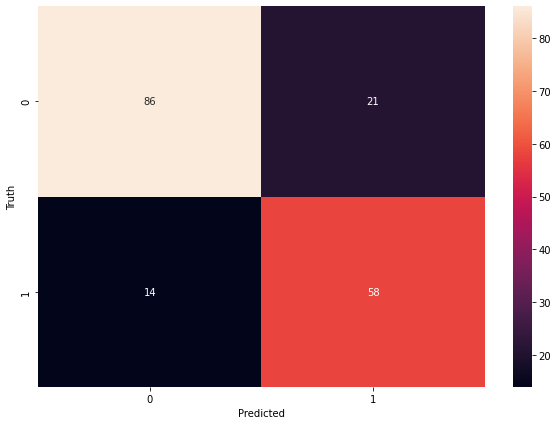

In [72]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h4 style="color:darkgreen">From the above Confusion matrix We can conclude that 
    <ul>
        <li>We predicted that 90 people will not sink and it is correct </li>
        <li>We predicted that 16 people will not sink and it is not correct</li>
        <li>We predicted that 56 people will sink and it is correct</li>
        <li>We predicted that 17 people will sink and it is not correct</li>
    </ul>